# Machine Learning Model on determining types of Mushrooms

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the data
mushroom_df=pd.read_csv("C:/Users/DELL/Desktop/mushroom_dataset.csv")

In [3]:
#analysing the data
print(mushroom_df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [4]:
#previewing the data
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#extracting the general information from the dataset
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#checking if any null values present in the dataset
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#checking the structure of the dataset
mushroom_df.shape

(8124, 23)

Text(0.5, 1.0, 'Edible or Poisonous Quantity Graph')

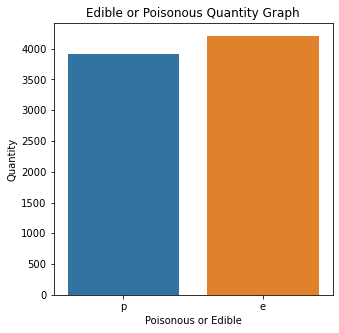

In [8]:
#checking the types of classes and its graphical representation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=mushroom_df, x="class")
ax.set_xlabel("Poisonous or Edible")
ax.set_ylabel('Quantity')
ax.set_title('Edible or Poisonous Quantity Graph')

In [9]:
#checking for the count values 
mushroom_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
#Now separating input and output variable
x=mushroom_df.drop(["class"],axis=1)
y=mushroom_df['class']

In [11]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in mushroom_df.columns:
    mushroom_df[col] = le_x.fit_transform(mushroom_df[col])

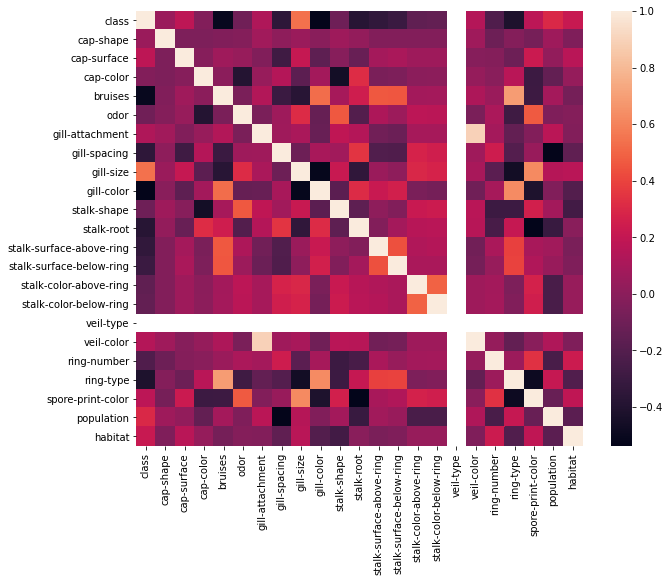

In [12]:
#checking for the correlation
corr_hmap=mushroom_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap)

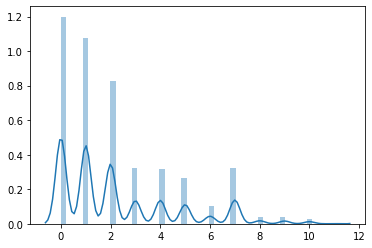

In [13]:
#vizualizing the class
sns.distplot(mushroom_df,kde=True)

class                          AxesSubplot(0.125,0.799681;0.168478x0.0803191)
cap-shape                   AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
cap-surface                 AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
cap-color                   AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
bruises                        AxesSubplot(0.125,0.703298;0.168478x0.0803191)
odor                        AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
gill-attachment             AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
gill-spacing                AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
gill-size                      AxesSubplot(0.125,0.606915;0.168478x0.0803191)
gill-color                  AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
stalk-shape                 AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
stalk-root                  AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
stalk-surface-above-ring       AxesSubplot(0.125,0.510532;0.1684

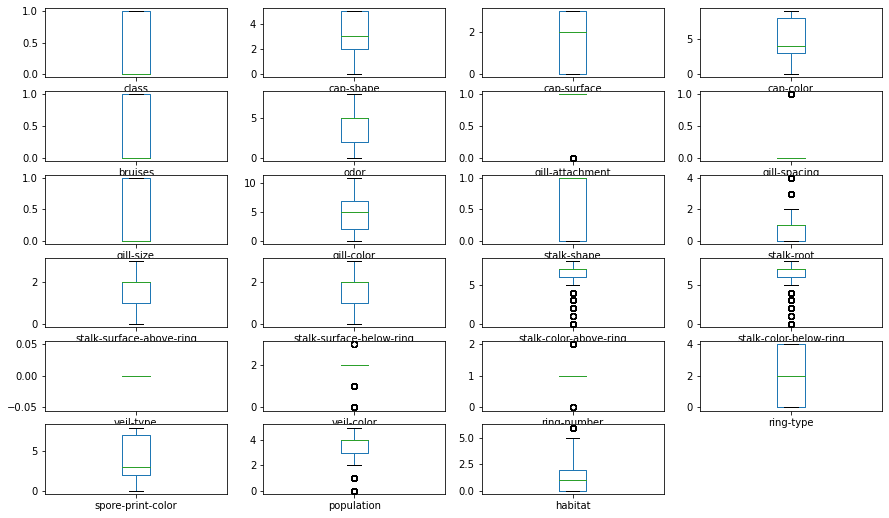

In [14]:
#checking for the outliers
mushroom_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,12))

In [15]:
#checking the skewness before removing the outliers
print(mushroom_df.skew())

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64


In [58]:
#checking for the statastical report
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [16]:
#Creating Dummy Variables
for data in x:
    mushroom_DV=[pd.get_dummies(x)]

In [17]:
#Combining all of Dummy Variables
x_final=pd.concat(mushroom_DV)
print(x_final.head())

In [19]:
#standardizing the input dataset 
sc=StandardScaler()
x_final=sc.fit_transform(x_final)
x_final

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [20]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [45]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,50):
        x_train,x_test,y_train,y_test=train_test_split(x_final,y,random_state=r_state,test_size=0.20)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  1.0
random state:  43  accuracy score:  1.0
random state:  44  accuracy score:  1.0
random state:  45  accuracy score:  1.0
random state:  46  accuracy score:  1.0
random state:  47  accuracy score:  1.0
random state:  48  accuracy score:  1.0
random state:  49  accuracy score:  1.0

max accuracy score at random state: 42  for the model  LR  is:  1.0


KNN
random state:  42  accuracy score:  1.0
random state:  43  accuracy score:  1.0
random state:  44  accuracy score:  1.0
random state:  45  accuracy score:  0.9993846153846154
random state:  46  accuracy score:  0.9987692307692307
random state:  47  accuracy score:  0.9993846153846154
random state:  48  accuracy score:  1.0
random state:  49  accuracy score:  1.0

max accuracy score at random state: 42  for the model  KNN  is:  1.0


DT
random state:  42  accuracy score:  1.0
random state:  43  accuracy score:  1.0
random state:  44  accuracy score:  1.0
random state:  45  accuracy score:  1.0
ra

In [53]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  1.0
Cross Validation Score(Std):  0.0

Model name:  KNN
Cross Validation Score(Mean):  0.9995384615384616
Cross Validation Score(Std):  0.0006153846153845955

Model name:  DT
Cross Validation Score(Mean):  1.0
Cross Validation Score(Std):  0.0

Model name:  GNB
Cross Validation Score(Mean):  0.964148635044709
Cross Validation Score(Std):  0.003457686444290699

Model name:  SVC
Cross Validation Score(Mean):  0.9995383431041629
Cross Validation Score(Std):  0.000615443875267316



In [54]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression())",100.000000,100.000000
1,"(KNN, KNeighborsClassifier())",100.000000,99.953846
2,"(DT, DecisionTreeClassifier())",100.000000,100.000000
3,"(GNB, GaussianNB())",97.292308,96.414864
4,"(SVC, SVC())",100.000000,99.953834


In [55]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x_final,y,random_state=42,test_size=0.10)
model_name=LogisticRegression()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  1.0
confusion matrix: 
[[433   0]
 [  0 380]]
classification report: 
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'p'
 'e' 'p' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'p' 'p' 'p'
 'e' 'p' 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e'
 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'p'
 '

In [56]:
#saving the model as pickle in a file
pickle.dump(model_name,open('LR_mushroom_data.pkl','wb'))

In [57]:
#loading the model for testing
loaded_model=pickle.load(open('LR_mushroom_data.pkl','rb'))
loaded_model.predict(x_test)

array(['e', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e',
       'e', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'e',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e